In [74]:
# Import necessary libraries

# For Data Analysis
import pandas as pd
import numpy as np

# for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifier Libraries
from sklearn.linear_model import SGDClassifier
#from sklearn.Neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")


In [2]:
sns

<module 'seaborn' from 'C:\\Users\\dera\\anaconda3\\Lib\\site-packages\\seaborn\\__init__.py'>

In [3]:
#load the dataset
#data = pd.read_csv(r"C:\\Users\\dera\\Desktop\\python\\capstone project\\Customer-Churn.csv"
data = pd.read_csv("CustomerChurn.csv")

In [4]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
#fix dataset for easy identification of numeriric and categorical variables
# Convert SeniorCitizen to object type
data['SeniorCitizen'] = data['SeniorCitizen'].astype('object')

# Convert 'TotalCharges' to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')


In [7]:
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Dictionary
CustomerID: A unique identifier assigned to each telecom customer.
Gender: The gender of the customer, which can be categorized as male, or female.
SeniorCitizen: A binary indicator that identifies whether the customer is a senior citizen or not.
Partner: Indicates whether the customer has a partner or not.
Dependents: Indicates whether the customer has dependents or not.
Tenure: The duration for which the customer has been subscribed to the telecom service.
PhoneService: Indicates whether the customer has a phone service or not.
MultipleLines: Indicates whether the customer has multiple lines or not.
InternetService: Indicates the type of internet service subscribed by the customer, such as DSL, fiber optic, or no internet service.
OnlineSecurity: Indicates whether the customer has online security services or not.
OnlineBackup: Indicates whether the customer has online backup services or not.
DeviceProtection: Indicates whether the customer has device protection services or not.
TechSupport: Indicates whether the customer has technical support services or not.
StreamingTV: Indicates whether the customer has streaming TV services or not.
StreamingMovies: Indicates whether the customer has streaming movie services or not.
Contract: Indicates the type of contract the customer has, such as a month-to-month, one-year, or two-year contract.
PaperlessBilling: Indicates whether the customer has opted for paperless billing or not.
PaymentMethod: Indicates the method of payment used by the customer, such as electronic checks, mailed checks, bank transfers, or credit cards.
MonthlyCharges: The amount charged to the customer on a monthly basis.
TotalCharges: The total amount charged to the customer over the entire tenure.
Churn: The target variable indicates whether the customer has churned (canceled the service) or not.


In [91]:
#Numerical statistics
data.describe ()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2281.916928,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.270398,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [9]:
# filter only Numerical column from heatmap
num_cols = data.select_dtypes(include=['number'])

In [10]:
num_cols.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [11]:
# Filter categorical colunm
cate_cols = data.select_dtypes(include=['object'])

In [12]:
#Categorical statistics
data.describe (include=["object","bool"])

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


### Observation
The dataset given by Connecttel has a total of 7043 customers

In [13]:
for col in cate_cols.columns:
  print(col)
  print(cate_cols[col].unique())#or unique

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn
['No' 'Yes']


In [15]:
#check for missing values// Non missing
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<Axes: >

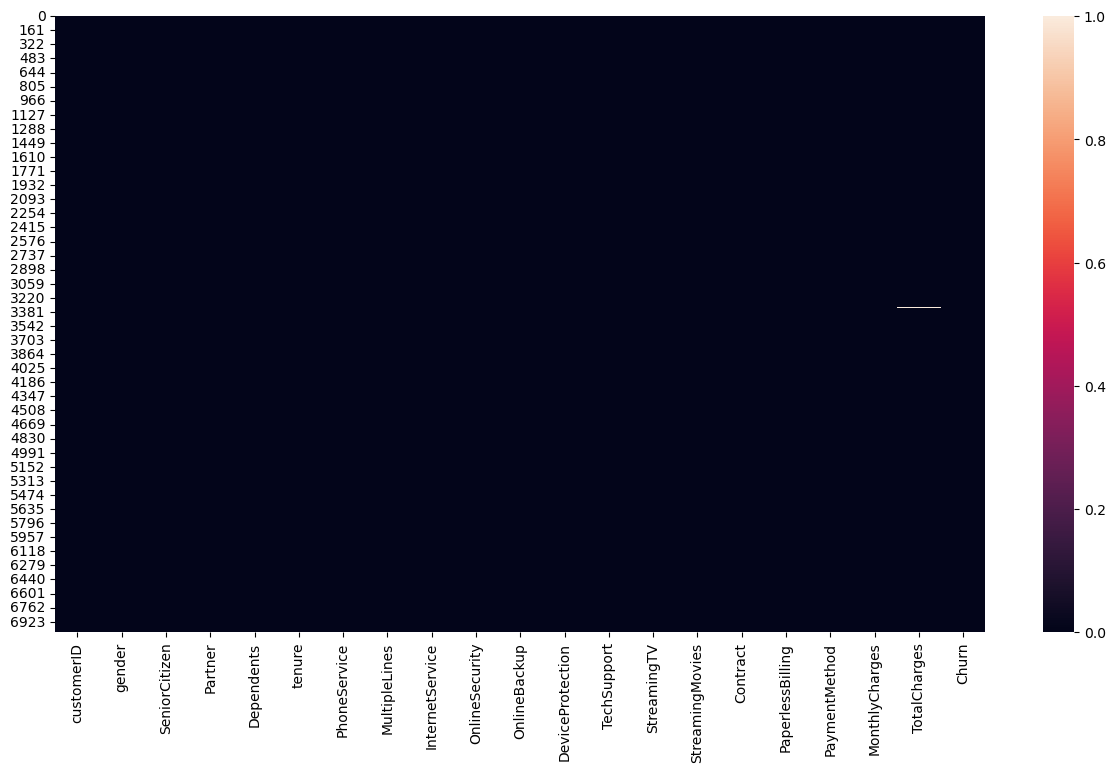

In [16]:
# visualize the freq of missing values
plt.figure(figsize = (15,8))
sns.heatmap(data.isna())

### The heat map shows there are missing values in  TotalCharges

In [19]:
# Check for missing values
missing_values = data['TotalCharges'].isnull().sum()
print(f'Missing values in TotalCharges: {missing_values}')

# Fill missing values with the median
median_totalcharges = data['TotalCharges'].median()
data['TotalCharges'].fillna(median_totalcharges, inplace=True)

# Verify that there are no more missing values
missing_values_after = data['TotalCharges'].isnull().sum()
print(f'Missing values in TotalCharges after filling: {missing_values_after}')


Missing values in TotalCharges: 11
Missing values in TotalCharges after filling: 0


# Univariate Analysis

#### Numerical Column Visualization

In [20]:
num_cols.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

Text(0.5, 1.0, ' ')

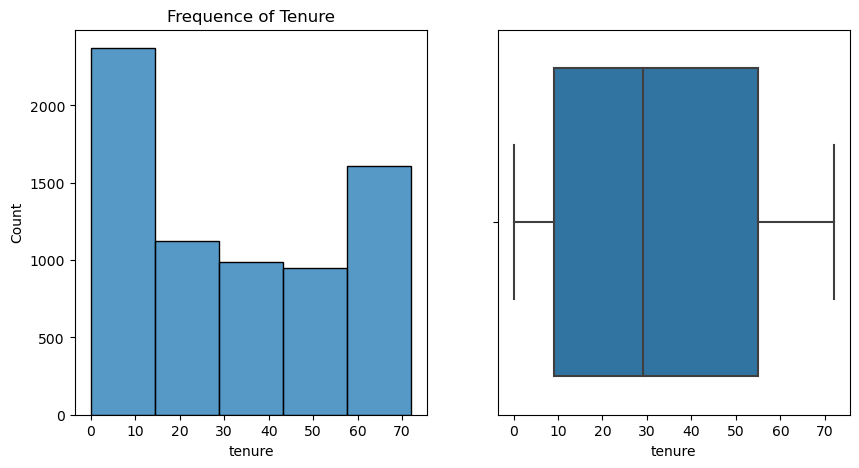

In [21]:
# Histplot and boxplot of tenure
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

sns.histplot(x="tenure", data=data, bins=5 ,ax=axs[0])
axs[0].set_title("Frequence of Tenure")

sns.boxplot(x="tenure", data=data, ax=axs[1])
axs[1].set_title("Boxplot Tenure ")


In [ ]:
''''This image presents two visualizations of the tenure distribution in what appears to be a customer dataset:
Overall insights:
1. There's a high number of new customers (0-10 months), suggesting either good acquisition or high churn.
2. A significant portion of customers have long tenures (60+ months), indicating a loyal customer base.
3. The distribution is somewhat bimodal, with peaks at both low and high tenure ranges.
4. The median tenure of 30-35 months suggests that half of the customers have been with the service for less than 3 years.

This tenure distribution is crucial for understanding customer loyalty, churn risk, and potentially segmenting customers for targeted marketing or retention strategies.

Text(0.5, 1.0, 'Frequency of Monthly Charges')

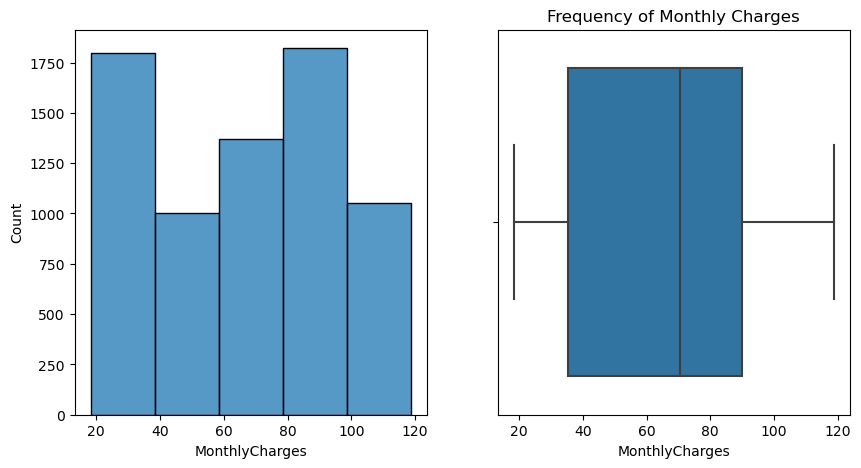

In [22]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

sns.histplot(x="MonthlyCharges", data=data, bins=5, ax=axs[0])
axs[0].set_title("")


sns.boxplot(x="MonthlyCharges", data=data, ax=axs[1])
axs[1].set_title("Frequency of Monthly Charges")


Text(0.5, 1.0, 'Frequency of Total Charges')

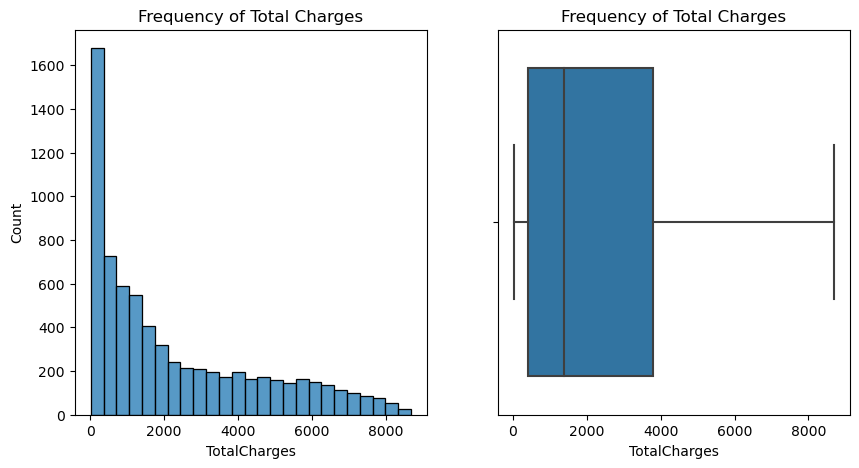

In [23]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

sns.histplot(x="TotalCharges", data=data,  ax=axs[0])
axs[0].set_title("Frequency of Total Charges")


sns.boxplot(x="TotalCharges", data=data, ax=axs[1])
axs[1].set_title("Frequency of Total Charges")


In [ ]:
''''Most charges are concentrated fewer customers.
There's high variability in the charges, with some extremely high values.
The data is not normally distributed and shows a clear positive skew.

### Categorical Column Visualization

In [ ]:
cate_cols.columns

Text(0.5, 1.0, 'Percentage of gender')

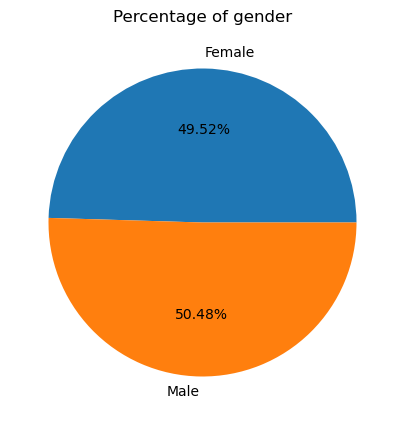

In [24]:
# Pie chart gender
from collections import Counter
fig,ax = plt.subplots(figsize=(5,5))
count = Counter(data["gender"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Percentage of gender")

In [ ]:
male are 50.48 female 49.52

In [ ]:
''''The pie chart shows an almost even split between male and female customers.
50.47% Male while 49.53% Female.
This suggests that the service appeals equally to both genders.

Text(0.5, 1.0, 'Percentage of Senior Citizen')

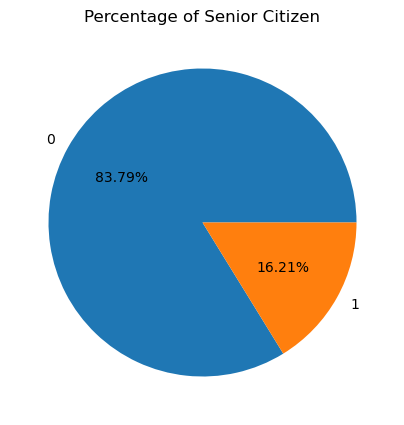

In [25]:
# Pie chart gender
from collections import Counter
fig,ax = plt.subplots(figsize=(5,5))
count = Counter(data["SeniorCitizen"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Percentage of Senior Citizen")

In [26]:
cate_cols.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn'],
      dtype='object')

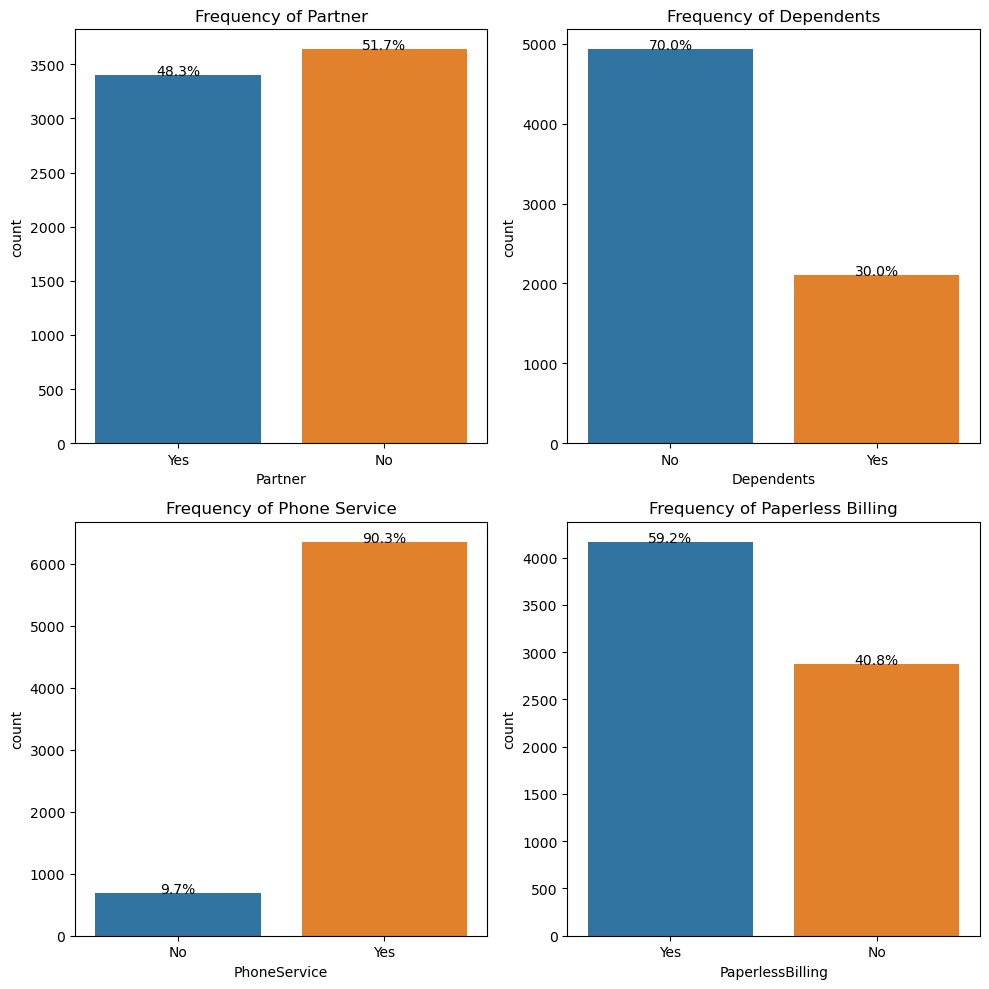

In [27]:
# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# Function to add percentages on bars
def add_percentages(ax, feature):
    total = len(data[feature])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center')

# Partner
sns.countplot(x="Partner", data=data, ax=axs[0,0])
axs[0,0].set_title("Frequency of Partner")
add_percentages(axs[0,0], 'Partner')

# Dependents
sns.countplot(x="Dependents", data=data, ax=axs[0,1])
axs[0,1].set_title("Frequency of Dependents")
add_percentages(axs[0,1], 'Dependents')

# Phone Service
sns.countplot(x="PhoneService", data=data, ax=axs[1,0])
axs[1,0].set_title("Frequency of Phone Service")
add_percentages(axs[1,0], 'PhoneService')

# Paperless Billing
sns.countplot(x="PaperlessBilling", data=data, ax=axs[1,1])
axs[1,1].set_title("Frequency of Paperless Billing")
add_percentages(axs[1,1], 'PaperlessBilling')

plt.tight_layout()
plt.show()

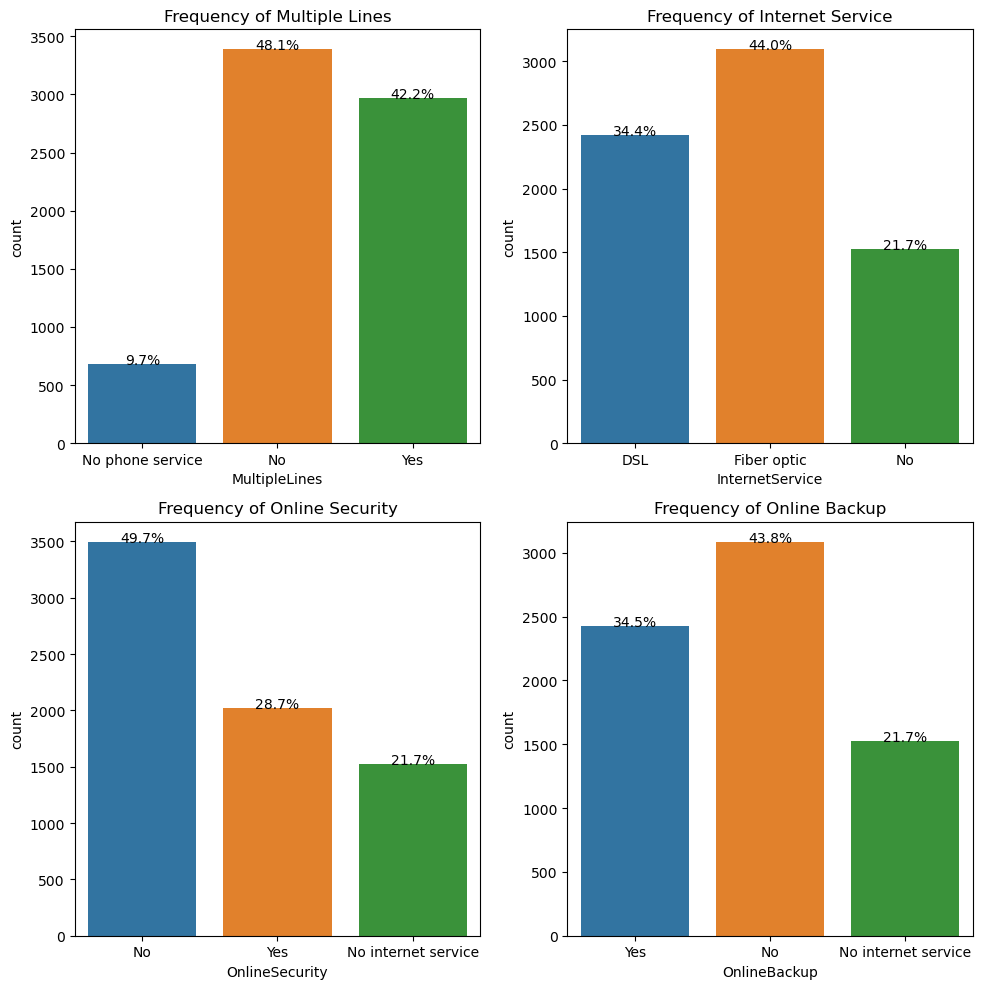

In [30]:
# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# Multiple Lines
sns.countplot(x="MultipleLines", data=data, ax=axs[0,0])
axs[0,0].set_title("Frequency of Multiple Lines")
add_percentages(axs[0,0], 'MultipleLines')

# Internet Service
sns.countplot(x="InternetService", data=data, ax=axs[0,1])
axs[0,1].set_title("Frequency of Internet Service")
add_percentages(axs[0,1], 'InternetService')

# Online Security
sns.countplot(x="OnlineSecurity", data=data, ax=axs[1,0])
axs[1,0].set_title("Frequency of Online Security")
add_percentages(axs[1,0], 'OnlineSecurity')

# Online Backup
sns.countplot(x="OnlineBackup", data=data, ax=axs[1,1])
axs[1,1].set_title("Frequency of Online Backup")
add_percentages(axs[1,1], 'OnlineBackup')

plt.tight_layout()
plt.show()

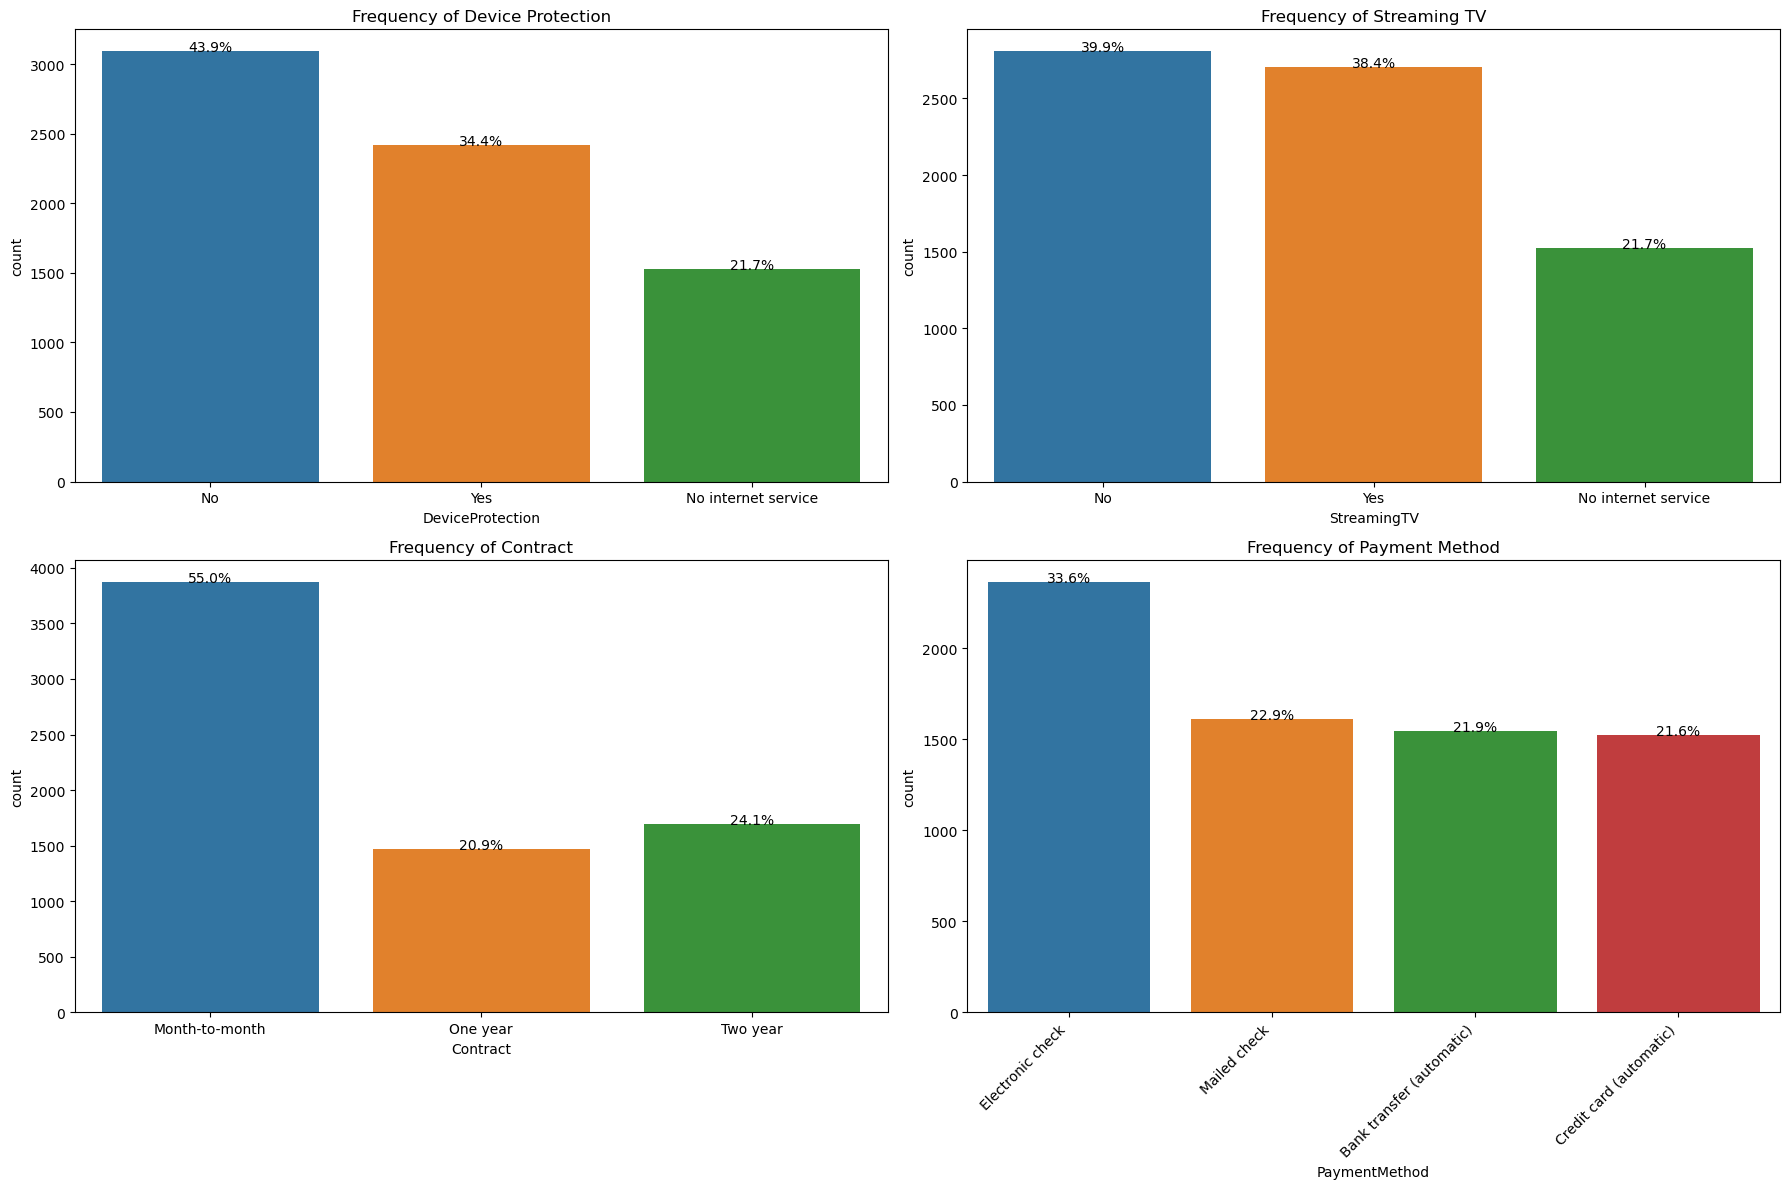

In [31]:
# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18,12))

# Device Protection
sns.countplot(x="DeviceProtection", data=data, ax=axs[0,0])
axs[0,0].set_title("Frequency of Device Protection")
add_percentages(axs[0,0], 'DeviceProtection')

# Streaming TV
sns.countplot(x="StreamingTV", data=data, ax=axs[0,1])
axs[0,1].set_title("Frequency of Streaming TV")
add_percentages(axs[0,1], 'StreamingTV')

# Contract
sns.countplot(x="Contract", data=data, ax=axs[1,0])
axs[1,0].set_title("Frequency of Contract")
add_percentages(axs[1,0], 'Contract')

# Payment Method
sns.countplot(x="PaymentMethod", data=data, ax=axs[1,1])
axs[1,1].set_title("Frequency of Payment Method")
plt.setp(axs[1,1].get_xticklabels(), rotation=45, ha="right")
add_percentages(axs[1,1], 'PaymentMethod')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Percentage of Churn')

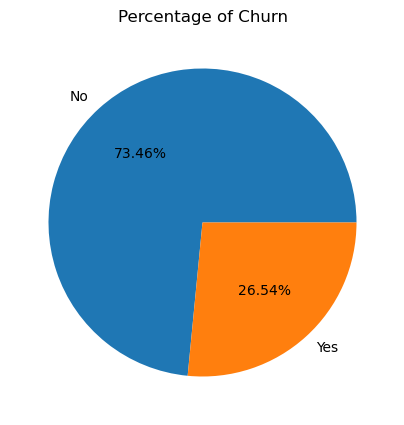

In [32]:
fig,ax = plt.subplots(figsize=(5,5))
count = Counter(data["Churn"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Percentage of Churn")

In [94]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Observations
1. This dataset of Connecttel a total of 7043 customers.
2. Male customers are 50.48% and female 49.52%.
3. Only 30.2% of customers have dependents, suggesting a majority are single or couples without children.
4. About 51.7% of customers have a partner, while 48.3% do not.
5. Around 16% are Elderly
6. Min tenure of customers is from zero to 10 months, max tenure is 60 to 70 months
7. There's high adoption, over (70%) of internet service, with DSL and fiber optic being the most common types.
8. A significant portion (49.1%) of users don't have online security measures.
9. The majority of users (51.3%) don't use online backup services.
10. Most customers (59.4%) have multiple phone lines. 
11. There's a relatively even split between those who stream TV (47.4%) and those who don't (52.6%)
12. There's a strong preference for month-to-month contracts (55.1%) over one or two-year contracts.
13. 59.2% of customers use paperless billing
14. Phone service has very high adoption at 90.3%

In [ ]:
# Results

# Bivariate Analysis

### Numerical Visualization

In [34]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [33]:
num_cols.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

Text(0.5, 1.0, 'Churn by Total Charges')

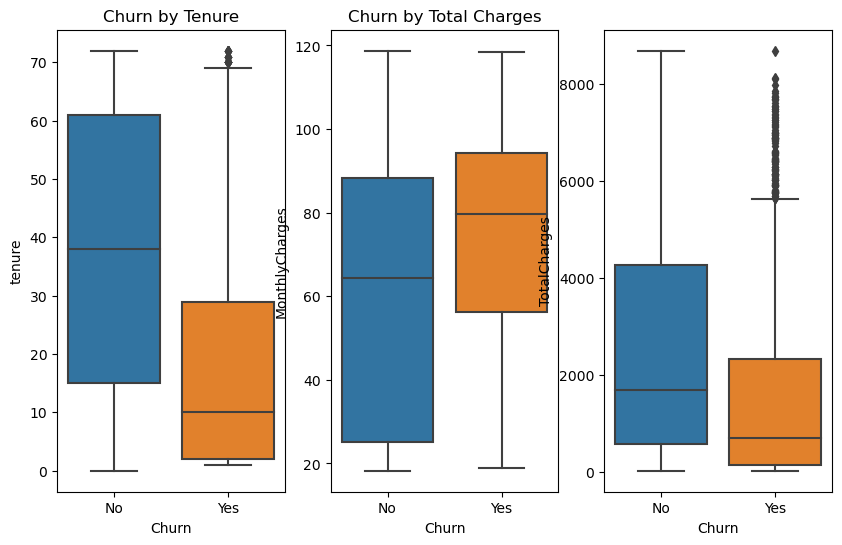

In [35]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10,6))

sns.boxplot(x="Churn",y="tenure", data=data,  ax=axs[0])
axs[0].set_title("Churn by Tenure")

sns.boxplot(x="Churn",y="MonthlyCharges", data=data,  ax=axs[1])
axs[1].set_title("Churn by Monthly Charges")

sns.boxplot(x="Churn",y="TotalCharges", data=data,  ax=axs[2])
axs[1].set_title("Churn by Total Charges")


### Categorical Visualization

In [39]:
cate_cols.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn'],
      dtype='object')

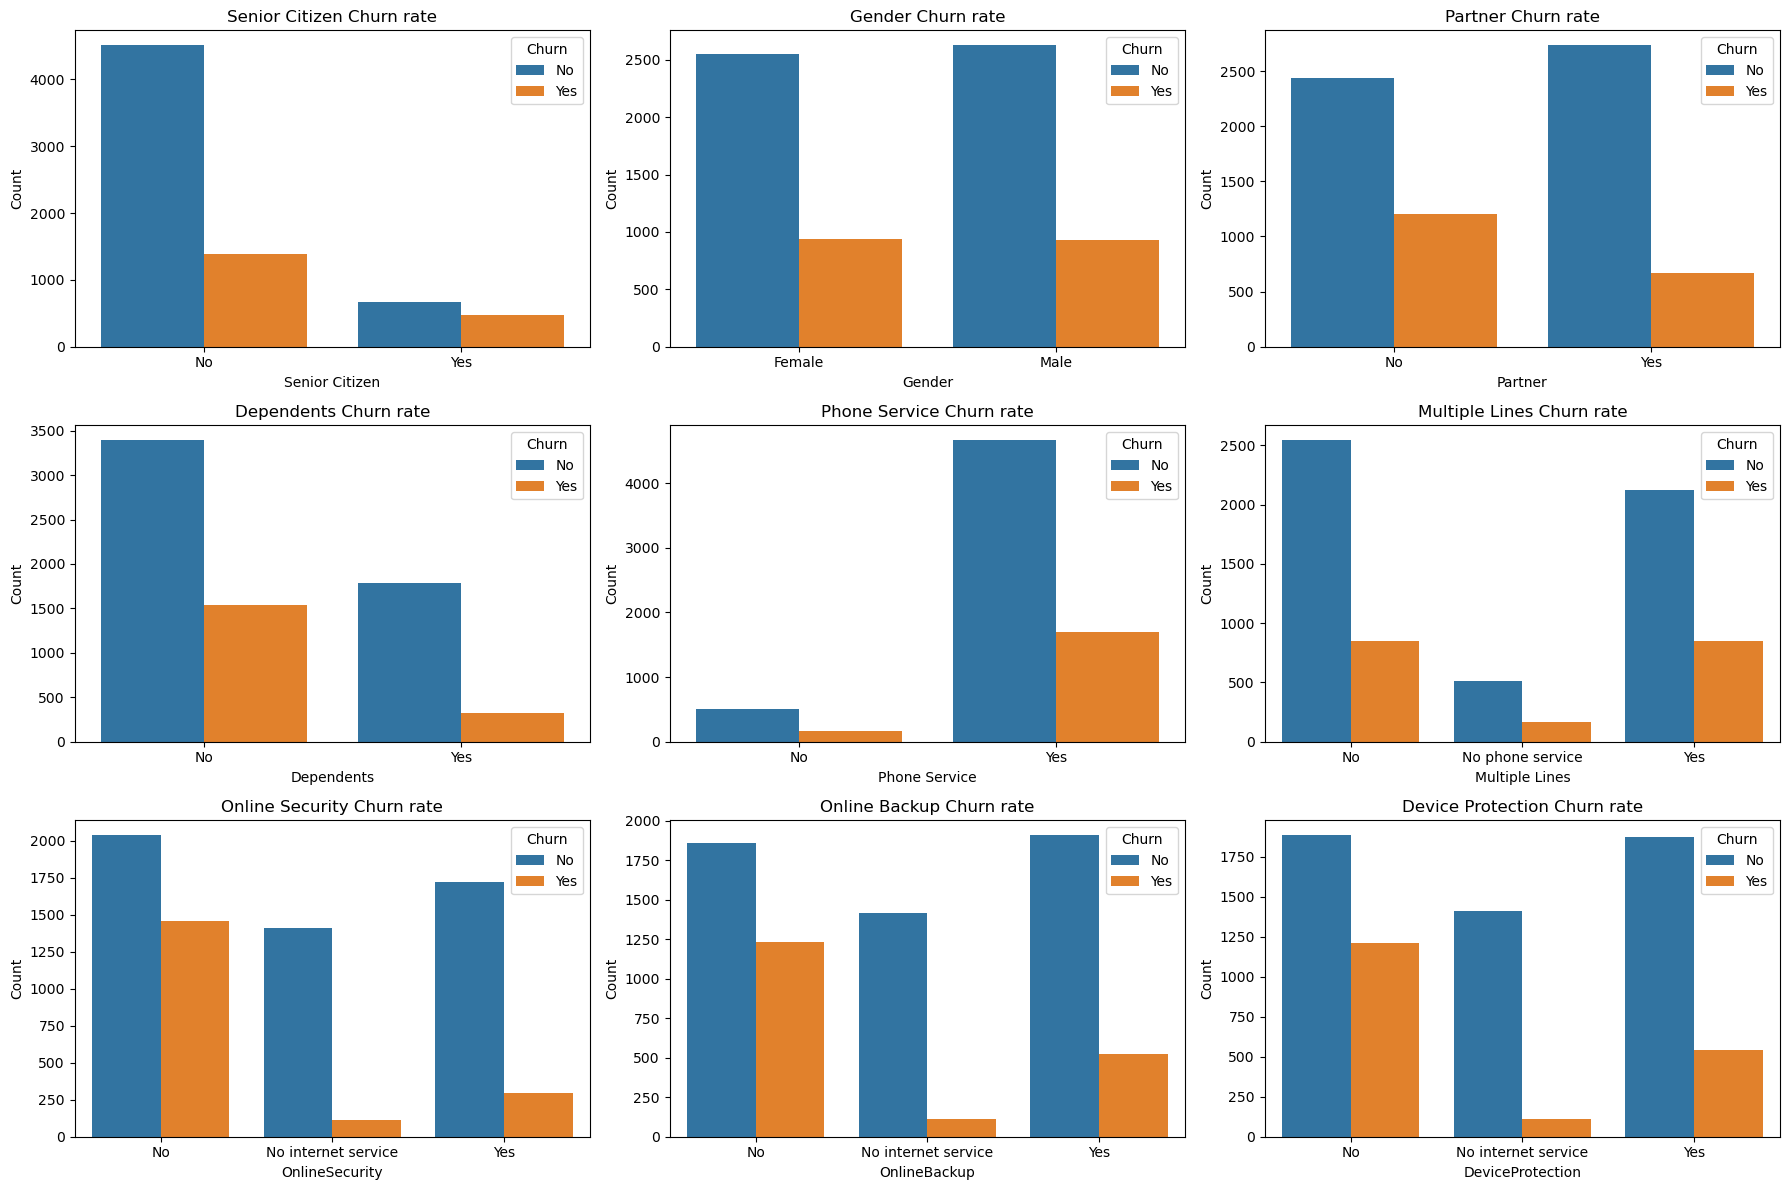

In [41]:
# Create a group for each variable
grp_senior = data.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='Count')
grp_gender = data.groupby(['gender', 'Churn']).size().reset_index(name='Count')
grp_partner = data.groupby(['Partner', 'Churn']).size().reset_index(name='Count')
grp_dependents = data.groupby(['Dependents', 'Churn']).size().reset_index(name='Count')
grp_phone = data.groupby(['PhoneService', 'Churn']).size().reset_index(name='Count')
grp_multi = data.groupby(['MultipleLines', 'Churn']).size().reset_index(name='Count')
grp_inter = data.groupby(['InternetService', 'Churn']).size().reset_index(name='Count')
grp_secure = data.groupby(['OnlineSecurity', 'Churn']).size().reset_index(name='Count')
grp_backup = data.groupby(['OnlineBackup', 'Churn']).size().reset_index(name='Count')
grp_protect = data.groupby(['DeviceProtection', 'Churn']).size().reset_index(name='Count')

# Create subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18,12))

# Senior Citizen
sns.barplot(x='SeniorCitizen', y='Count', hue='Churn', data=grp_senior, ax=axs[0,0])
axs[0,0].set_title('Senior Citizen Churn rate')
axs[0,0].set_xlabel('Senior Citizen')
axs[0,0].set_ylabel('Count')
axs[0,0].set_xticks([0, 1])
axs[0,0].set_xticklabels(['No', 'Yes'])

# Gender
sns.barplot(x='gender', y='Count', hue='Churn', data=grp_gender, ax=axs[0,1])
axs[0,1].set_title('Gender Churn rate')
axs[0,1].set_xlabel('Gender')
axs[0,1].set_ylabel('Count')

# Partner
sns.barplot(x='Partner', y='Count', hue='Churn', data=grp_partner, ax=axs[0,2])
axs[0,2].set_title('Partner Churn rate')
axs[0,2].set_xlabel('Partner')
axs[0,2].set_ylabel('Count')

# Dependents
sns.barplot(x='Dependents', y='Count', hue='Churn', data=grp_dependents, ax=axs[1,0])
axs[1,0].set_title('Dependents Churn rate')
axs[1,0].set_xlabel('Dependents')
axs[1,0].set_ylabel('Count')

# Phone Service
sns.barplot(x='PhoneService', y='Count', hue='Churn', data=grp_phone, ax=axs[1,1])
axs[1,1].set_title('Phone Service Churn rate')
axs[1,1].set_xlabel('Phone Service')
axs[1,1].set_ylabel('Count')

# Multiple Lines
sns.barplot(x='MultipleLines', y='Count', hue='Churn', data=grp_multi, ax=axs[1,2])
axs[1,2].set_title('Multiple Lines Churn rate')
axs[1,2].set_xlabel('Multiple Lines')
axs[1,2].set_ylabel('Count')


# Online Security
sns.barplot(x='OnlineSecurity', y='Count', hue='Churn', data=grp_secure, ax=axs[2,0])
axs[2,0].set_title('Online Security Churn rate')
axs[2,0].set_xlabel('OnlineSecurity')
axs[2,0].set_ylabel('Count')

# Online Backup
sns.barplot(x='OnlineBackup', y='Count', hue='Churn', data=grp_backup, ax=axs[2,1])
axs[2,1].set_title('Online Backup Churn rate')
axs[2,1].set_xlabel('OnlineBackup')
axs[2,1].set_ylabel('Count')

# Device Protection
sns.barplot(x='DeviceProtection', y='Count', hue='Churn', data=grp_protect, ax=axs[2,2])
axs[2,2].set_title('Device Protection Churn rate')
axs[2,2].set_xlabel('DeviceProtection')
axs[2,2].set_ylabel('Count')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [95]:
cate_cols.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn'],
      dtype='object')

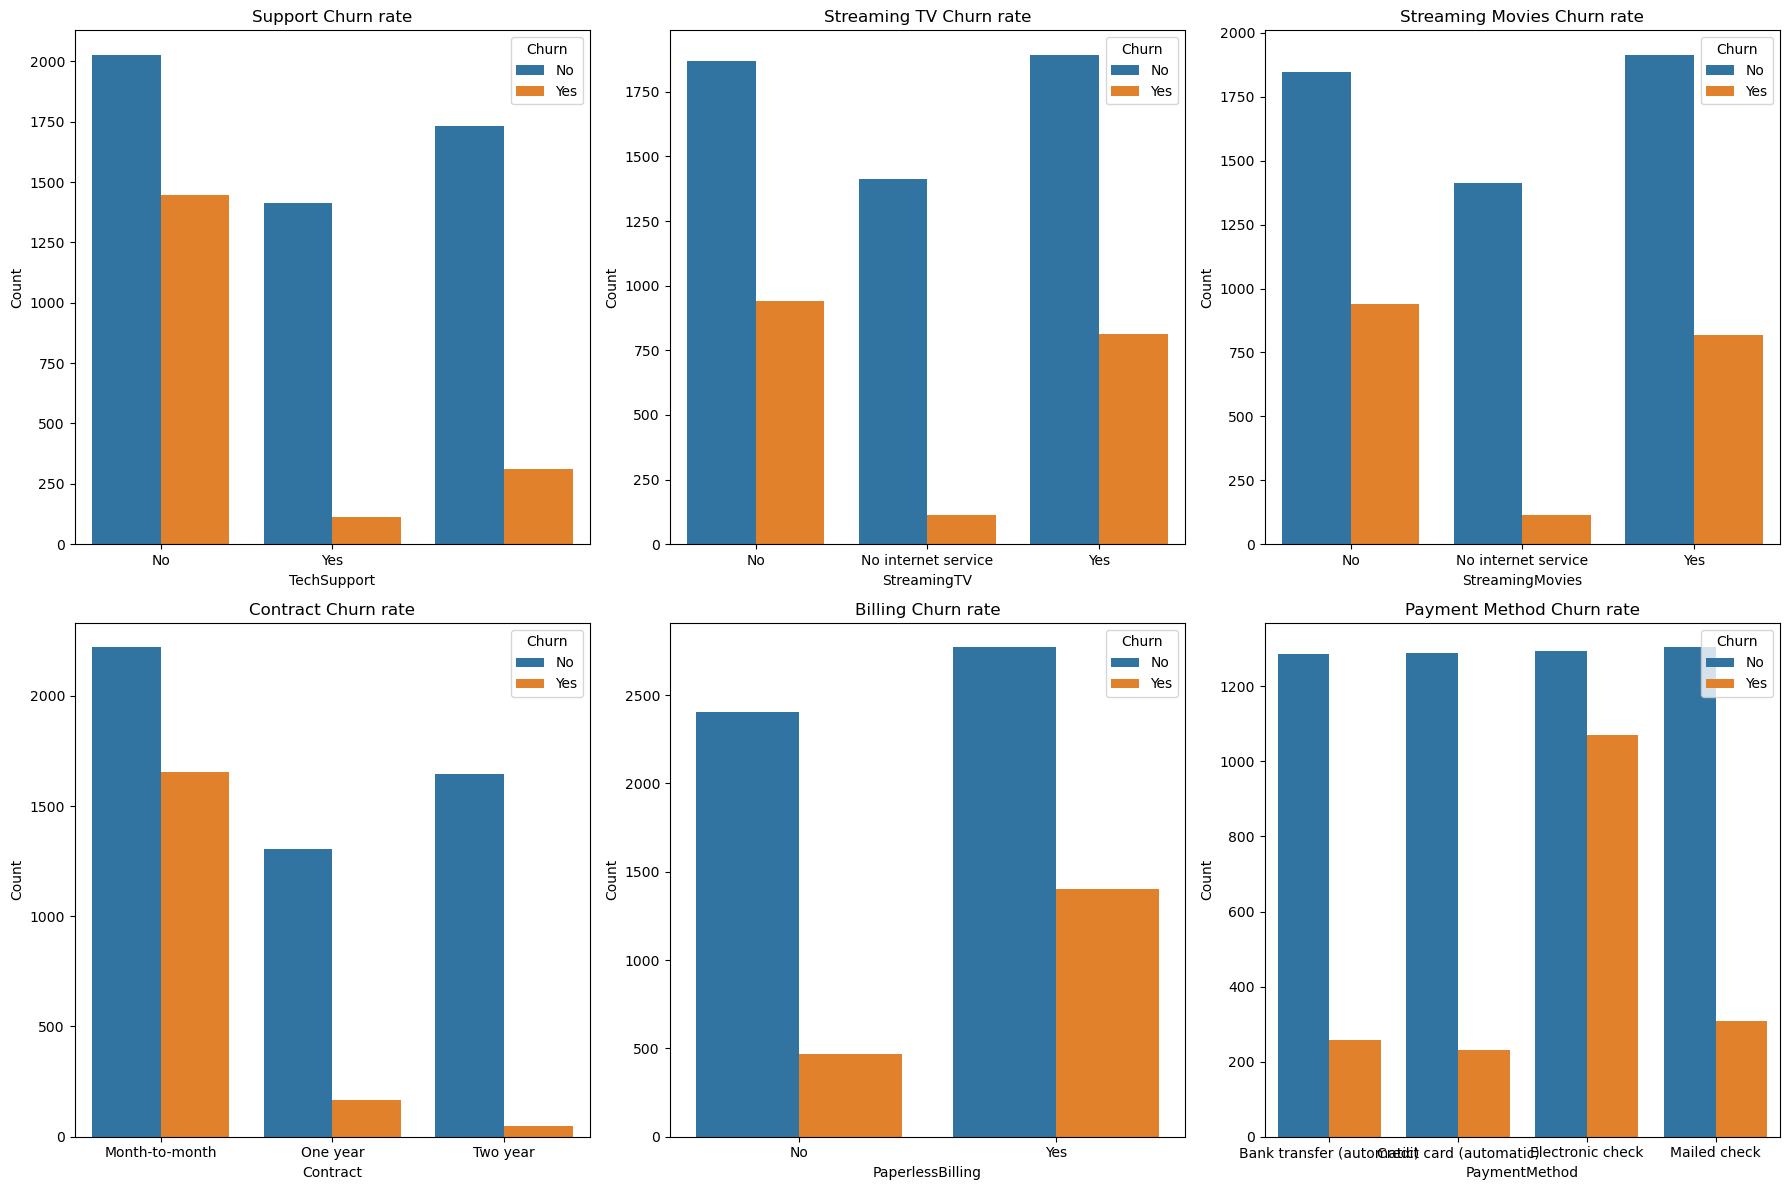

In [38]:
# Create a group for each variable
grp_techsup = data.groupby(['TechSupport', 'Churn']).size().reset_index(name='Count')
grp_tv = data.groupby(['StreamingTV', 'Churn']).size().reset_index(name='Count')
grp_movies = data.groupby(['StreamingMovies', 'Churn']).size().reset_index(name='Count')
grp_contract = data.groupby(['Contract', 'Churn']).size().reset_index(name='Count')
grp_billing = data.groupby(['PaperlessBilling', 'Churn']).size().reset_index(name='Count')
grp_payment = data.groupby(['PaymentMethod', 'Churn']).size().reset_index(name='Count')

# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18,12))

# Tech Support
sns.barplot(x='TechSupport', y='Count', hue='Churn', data=grp_techsup, ax=axs[0,0])
axs[0,0].set_title('Support Churn rate')
axs[0,0].set_xlabel('TechSupport')
axs[0,0].set_ylabel('Count')
axs[0,0].set_xticks([0, 1])
axs[0,0].set_xticklabels(['No', 'Yes'])

# Streaming TV
sns.barplot(x='StreamingTV', y='Count', hue='Churn', data=grp_tv, ax=axs[0,1])
axs[0,1].set_title('Streaming TV Churn rate')
axs[0,1].set_xlabel('StreamingTV')
axs[0,1].set_ylabel('Count')

# Streaming Movies
sns.barplot(x='StreamingMovies', y='Count', hue='Churn', data=grp_movies, ax=axs[0,2])
axs[0,2].set_title('Streaming Movies Churn rate')
axs[0,2].set_xlabel('StreamingMovies')
axs[0,2].set_ylabel('Count')

# Contract
sns.barplot(x='Contract', y='Count', hue='Churn', data=grp_contract, ax=axs[1,0])
axs[1,0].set_title('Contract Churn rate')
axs[1,0].set_xlabel('Contract')
axs[1,0].set_ylabel('Count')

# Paperless Billing
sns.barplot(x='PaperlessBilling', y='Count', hue='Churn', data=grp_billing, ax=axs[1,1])
axs[1,1].set_title('Billing Churn rate')
axs[1,1].set_xlabel('PaperlessBilling')
axs[1,1].set_ylabel('Count')

# Payment Method
sns.barplot(x='PaymentMethod', y='Count', hue='Churn', data=grp_payment, ax=axs[1,2])
axs[1,2].set_title('Payment Method Churn rate')
axs[1,2].set_xlabel('PaymentMethod')
axs[1,2].set_ylabel('Count')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


### Observations about churn rate
1. Tenure, Monthly charge and Total Charges:
   The box plots suggest that customers who churn tend to have shorter tenure, higher monthly charge and lower total charges.
2. Senior Citizens: Senior citizens have a higher churn rate compared to non-seniors.
3. Partner Status and Dependents: Customers without partners or dependents have a higher churn rate than those with partners.
4. PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection,TechSupport, Streaming TV and    movies:All these service are mostly used by long tenure customers.they are less likely to churn.
5. Contract shows that there is less likely to churn across month, one year and two years. the is also a very higher chance of churn in month than in other contract type.
6. Paperless billing seems to have a positive impact on customer retention.

# Multivariate Analysis

### Numerical Visualization

In [43]:
# filter only Numerical column for heatmap
num_cols = data.select_dtypes(include=['number'])
# create a correlation matrix
correlation_matrix = num_cols.corr()

In [44]:
num_cols.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

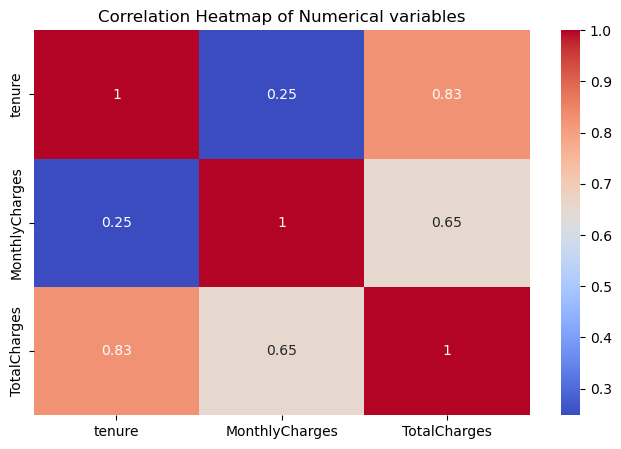

In [45]:
#create a heatmap
plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical variables')
plt.show()

### Observation
1. Tenure is the strongest predictor of TotalCharges at 83.
2. There's potential multicollinearity between TotalCharges and the other two variables, which could impact some statistical models.
3. MonthlyCharges and tenure provide somewhat independent information, as they're not strongly correlated with each other.

### Categorical Visualization

In [46]:
cate_cols = data.select_dtypes(include=['object'])
for col in cate_cols.columns:
  print(col)
  print(cate_cols[col].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn
['No' 'Yes']


In [50]:
#Label Encoding on categorical colunms
##Label Encoding: the act of changing text to numbers so models can understand the data

label = LabelEncoder()
#Loop
for col in cate_cols.columns:
    data[col] = label.fit_transform(data[col])

In [54]:
data.dtypes

customerID            int64
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [61]:
cate_matrix = data.corr()

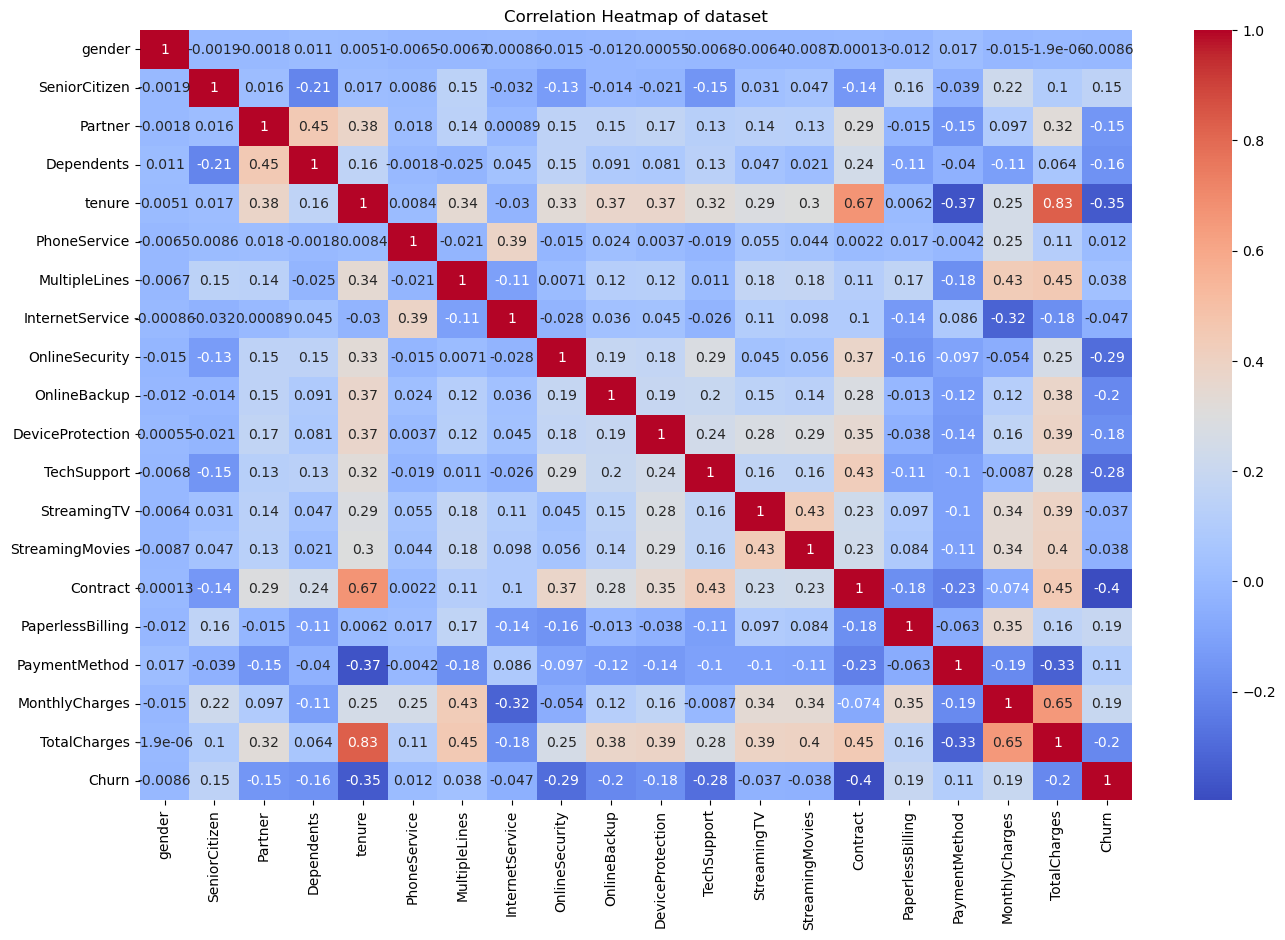

In [63]:
# Create a heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(cate_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of dataset')
plt.show()

### Observations
1. Target variable: "Churn" is our target variable, I'd consider features with the strongest correlations to it:
   TotalCharges (-0.2)
   Contract (-0.4)
   tenure (-0.35)
   MonthlyCharges (0.19) 
2. Other potentially useful predictors with moderate correlations to Churn:
   InternetService (-0.047)
   OnlineSecurity (-0.29)
   TechSupport (-0.28)
   PaymentMethod (0.11)
3. Variables to avoid due to high multicollinearity:
   TotalCharges and tenure (0.83)
   MonthlyCharges and TotalCharges (0.65)
4. Interesting relationships to consider:
   Contract has strong correlations with several variables (e.g., tenure 0.67, TotalCharges 0.45)
   Partner and Dependents are highly correlated (0.45)

# Data Preprocessing / feature Engineering

''''In feature selection:
We want variables that correlate strongly with churn (our target).
We prefer variables that aren't strongly correlated with each other.
The following colunms visualize in heatmap above meets the criteria
'tenure'
'Contract'
'MonthlyCharge
'InternetService'
'OnlineSecurity'
'OnlineBackup'
'DeviceProtection'
'TechSupport'
'PaymentMethod'

In [64]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [66]:
# # Create a copy of the data (Exclude target/label)
df = data [['tenure', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'Contract','PaymentMethod', 'MonthlyCharges',]]

tag = data[['Churn']]

In [70]:
# Dealing with outliers
# Normalising the data /adding new scaled columns and droping old
scaler = MinMaxScaler()
df["Scaled_tenure"] = scaler.fit_transform(df['tenure'].values.reshape(-1,1))
df["Scaled_monthly"] = scaler.fit_transform(df['MonthlyCharges'].values.reshape(-1,1))

df.drop(['tenure','MonthlyCharges'], axis=1, inplace=True)

df.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaymentMethod,Scaled_tenure,Scaled_monthly
0,0,0,2,0,0,0,2,0.013889,0.115423
1,0,2,0,2,0,1,3,0.472222,0.385075
2,0,2,2,0,0,0,3,0.027778,0.354229
3,0,2,0,2,2,1,0,0.625000,0.239303
4,1,0,0,0,0,0,2,0.027778,0.521891


In [71]:
tag.head()

,Churn
0,0
1,0
2,1
3,0
4,1


## Machine learning

In [72]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df, tag, test_size = 0.25, random_state = 42)

Logistic Regression
Accuracy Score: 0.80
F1 Score: 0.59
Precision Score: 0.66
Recall Score: 0.54
AUC-ROC Score: 0.72


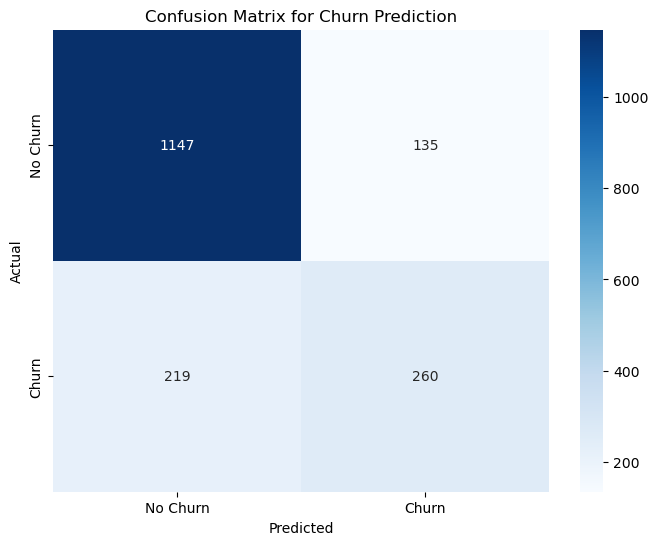

In [88]:
# Fitting/training ML model: LogisticRegression
logr = LogisticRegression()
logr.fit(x_train, y_train)
y_pred = logr.predict(x_test)

# Calculate the evaluation metrics
acc_score = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Logistic Regression")
print(f"Accuracy Score: {acc_score:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Precision Score: {precision:.2f}")
print(f"Recall Score: {recall:.2f}")
print(f"AUC-ROC Score: {auc_roc:.2f}")

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Churn Prediction")
plt.show()

RandomForestClassifier
Accuracy Score: 0.78
F1 Score: 0.54
Precision Score: 0.62
Recall Score: 0.48
AUC-ROC Score: 0.69


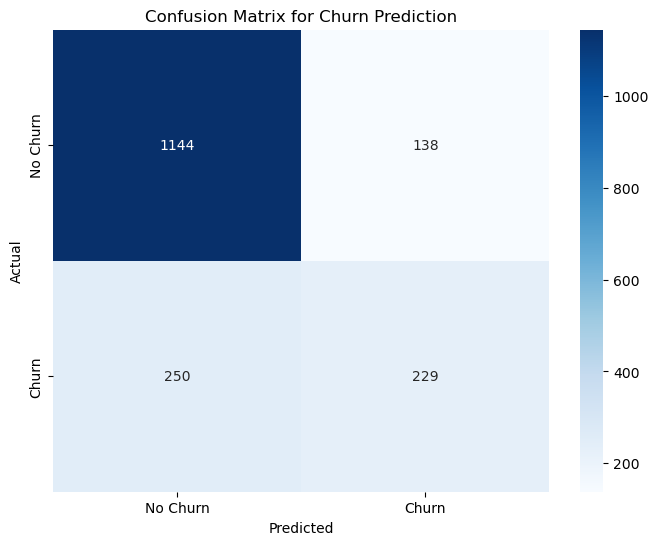

In [89]:
# Fitting/training ML model: RandomForestClassifier()
ran = RandomForestClassifier()
ran.fit(x_train, y_train)
y_pred = ran.predict(x_test)

# Calculate the evaluation metrics
acc_score = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("RandomForestClassifier")
print(f"Accuracy Score: {acc_score:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Precision Score: {precision:.2f}")
print(f"Recall Score: {recall:.2f}")
print(f"AUC-ROC Score: {auc_roc:.2f}")

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Churn Prediction")
plt.show()

StandardScaler
Accuracy Score: 0.79
F1 Score: 0.55
Precision Score: 0.66
Recall Score: 0.47
AUC-ROC Score: 0.69


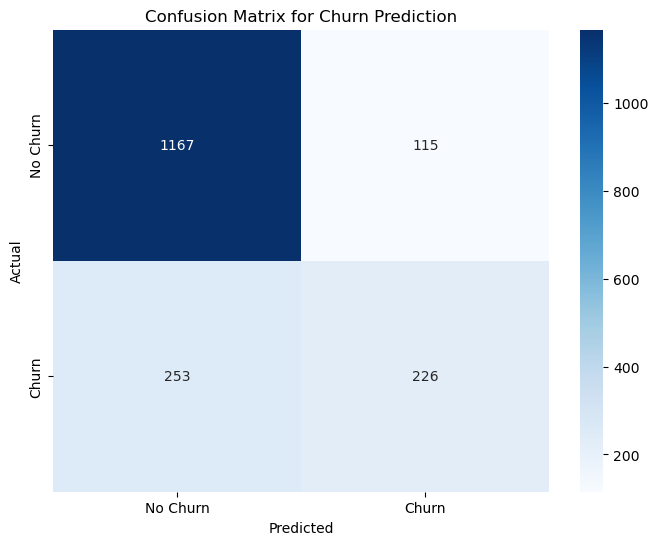

In [90]:
# Fitting/training ML model: StandardScaler(SVC)
stan = SVC()
stan.fit(x_train, y_train)
y_pred = stan.predict(x_test)

# Calculate the evaluation metrics
acc_score = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("StandardScaler")
print(f"Accuracy Score: {acc_score:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Precision Score: {precision:.2f}")
print(f"Recall Score: {recall:.2f}")
print(f"AUC-ROC Score: {auc_roc:.2f}")

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Churn Prediction")
plt.show()

In [ ]:
#

### Observation
1. Based on the confusion matrices and metrics shown for the three models (StandardScaler, RandomForestClassifier, and Logistic Regression), here are some key insights:

2. Performance: All three models show similar overall performance, with accuracy scores around 0.78-0.80 and AUC-ROC scores of 0.69-0.72. This suggests that they are performing reasonably well, but there's still room for improvement.

3. Class Imbalance: The confusion matrices reveal a significant class imbalance, with many more "No Churn" cases than "Churn" cases. This is important to consider when interpreting the models' performance.

4. False Negatives: All models have a relatively high number of false negatives (predicting "No Churn" when the actual outcome is "Churn"). This is more concerning than false positives in a churn prediction scenario, as it means the company might miss opportunities to retain customers who are actually at risk of churning.

5. Model Selection: The Logistic Regression model has the highest accuracy (0.80) and a slightly better balance between precision and recall for the "Churn" class. It might be the preferable model if a simple, interpretable model is desired.